### **Task 2**

In [121]:
#Loading dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
!pip install python_speech_features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import sys
import os
import pickle
import random
import operator
import math
import numpy as np
import pandas as pd
from collections import defaultdict
import sunau
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import imageio
import cv2
import seaborn as sns
import pickle
from python_speech_features import mfcc
import scipy.io.wavfile as wav
from tempfile import TemporaryFile
from imutils import paths
from pathlib import Path

In [123]:
labels = ['asavari', 'bageshree', 'bhairavi','bhoopali', 'darbari', 'malkauns', 'sarang', 'yaman']

In [124]:
def zero_crossing_rate(rate,start,finish):
    zero_crossings = librosa.zero_crossings(rate[start:finish], pad=False)
    return (sum(zero_crossings) / len(rate))

def spectral_centroid(rate, sig,start,finish):
    spectral_centroids = librosa.feature.spectral_centroid(y=rate[start:finish], sr=sig)[0]
    return np.mean(spectral_centroids)

def spectral_bandwidth(rate, sig,start,finish):
    spectral_bandwidths = librosa.feature.spectral_bandwidth(y=rate[start:finish], sr = sig)
    return np.mean(spectral_bandwidths)

def spectral_rolloff(rate, sig,start,finish):
    spectral_rolloffs = librosa.feature.spectral_rolloff(y=rate[start:finish], sr=sig)[0]
    return np.mean(spectral_rolloffs)

def mfcc(rate, sig,start,finsh):
    mfccs = librosa.feature.mfcc(y=rate[start:finish], sr=sig)
    return list(mfccs.mean(axis=1))

def chroma_frequencies(rate, sig,start,finish):
    hop_length = 512
    chromagram = librosa.feature.chroma_stft(y=rate[start:finish], sr=sig, hop_length=hop_length)
    return np.mean(chromagram)

def rmse(rate):
    return np.sqrt(np.mean(rate**2))

In [125]:
df_features = pd.DataFrame(columns = ['file_name', 'zero_crossing_rate', 'spectral_centroid', 'spectral_bandwidth',
                                          'spectral_rolloff', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
                                          'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
                                          'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16',
                                          'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'chroma_frequency',
                                          'rmse', 'label'])

In [126]:
def extract_name(input_string):
    result = ''
    for char in input_string:
        if char.isdigit():
            break
        result += char
    return result

In [127]:
label_num={
    'asavari':0, 'bageshree':1, 'bhairavi':2,'bhoopali':3, 'darbari':4, 'malkauns':5, 'sarang':6, 'yaman':7
}

In [128]:
import librosa
def get_duration_librosa(file_path):
   audio_data, sample_rate = librosa.load(file_path)
   duration = librosa.get_duration(y=audio_data, sr=sample_rate)
   return duration

# Increasing the dataset for better results

In [129]:
samples_per_segment = int(22050 / 10)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / 10)
path = "/content/drive/MyDrive/raga_dataset/raga_data"
os.chdir(path)
for file in os.listdir(path):
  SAMPLES_PER_TRACK = 22050 * get_duration_librosa(file)
  samples_per_segment = int(SAMPLES_PER_TRACK / 10)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / 10)
  name=extract_name(file)
  category=name
  if(name=='Bhairavi'):
    category='bhairavi'
  elif(name=='bhoop'):
    category='bhoopali'
  elif(name=='DKanada'):
    category='darbari'

  x , sr = librosa.load(file)
  for d in range(10):
    row = []
    start = samples_per_segment * d
    finish = start + samples_per_segment
    row.append(file)
    row.append(zero_crossing_rate(x,start,finish))
    row.append(spectral_centroid(x, sr,start,finish))
    row.append(spectral_bandwidth(x, sr,start,finish))
    row.append(spectral_rolloff(x, sr,start,finish))
    row.extend(mfcc(x, sr,start,finish))
    row.append(chroma_frequencies(x, sr,start,finish))
    row.append(rmse(x))
    row.append(label_num[category])
    df_features.loc[len(df_features)] = row
os.chdir(os.getcwd())


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [130]:
df_features.shape

(820, 28)

In [131]:
X = df_features.iloc[:,1:-1]
y = df_features.iloc[:,-1]

<Axes: >

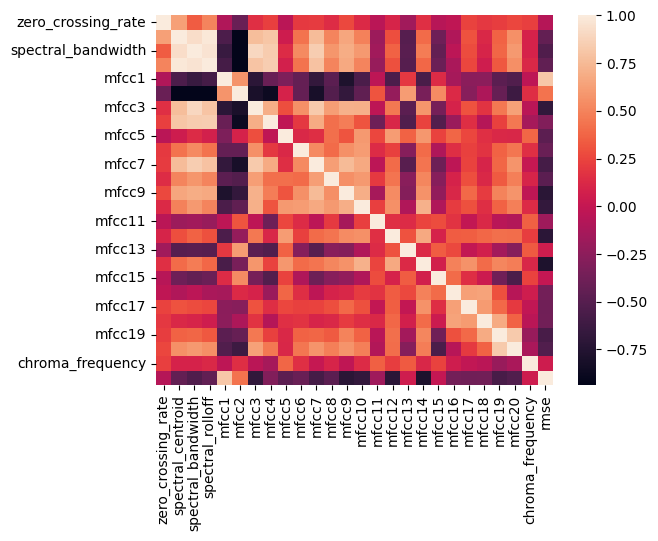

In [132]:
import seaborn as sns
sns.heatmap(X.corr())

In [133]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

In [134]:
print(model.feature_importances_)


[0.0292809  0.03104119 0.03844773 0.03084851 0.04825777 0.03695765
 0.03757656 0.04163148 0.02879381 0.03559832 0.03466138 0.03088092
 0.05013856 0.0490338  0.027159   0.03418559 0.03485347 0.03418552
 0.03572294 0.03170181 0.04641058 0.02580858 0.02620736 0.02444067
 0.02918029 0.12699562]


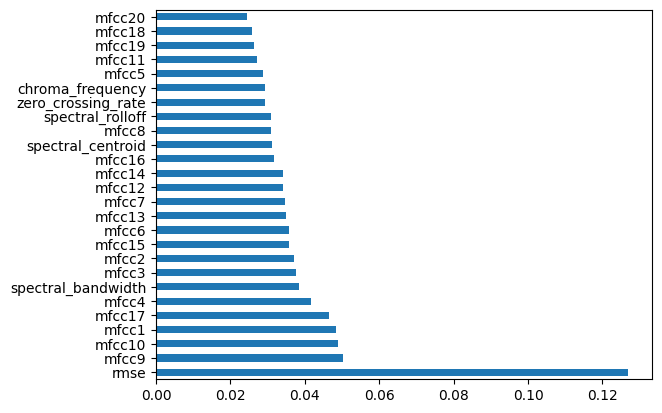

In [135]:
#Checking most relevant features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [136]:
df=df_features.drop(['mfcc8', 'mfcc19', 'mfcc3', 'mfcc2', 'mfcc1','mfcc5','mfcc13','mfcc12','spectral_bandwidth'], axis=1)

In [137]:
df.shape
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [138]:
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
y=np.array(y)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [139]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape

(738, 17, 1)

# CNN MODEL

In [140]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',padding='same',strides=(1,1), input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1,1)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',strides=(1,1)))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',strides=(1,1)))

model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))
opt = SGD(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 17, 1, 16)         160       
                                                                 
 conv2d_43 (Conv2D)          (None, 17, 1, 32)         4640      
                                                                 
 conv2d_44 (Conv2D)          (None, 17, 1, 64)         18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 17, 1, 128)        73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 9, 1, 128)         0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 9, 1, 128)         0         
                                                     

In [141]:
print(X_train.shape)
print(y_train.shape)


(738, 17, 1)
(738, 8)


In [142]:
history = model.fit(X_train, y_train, batch_size=10, epochs=50,validation_split=0.1)

Epoch 1/50
67/67 [==============================] - 3s 17ms/step - loss: 2.7823 - accuracy: 0.1401 - val_loss: 2.1953 - val_accuracy: 0.0676
Epoch 2/50
67/67 [==============================] - 1s 13ms/step - loss: 2.0977 - accuracy: 0.1235 - val_loss: 2.0445 - val_accuracy: 0.2297
Epoch 3/50
67/67 [==============================] - 1s 19ms/step - loss: 1.9400 - accuracy: 0.2349 - val_loss: 1.8193 - val_accuracy: 0.3514
Epoch 4/50
67/67 [==============================] - 2s 29ms/step - loss: 1.6153 - accuracy: 0.4006 - val_loss: 1.4540 - val_accuracy: 0.4459
Epoch 5/50
67/67 [==============================] - 2s 27ms/step - loss: 1.4024 - accuracy: 0.4608 - val_loss: 1.4119 - val_accuracy: 0.4730
Epoch 6/50
67/67 [==============================] - 1s 22ms/step - loss: 1.2240 - accuracy: 0.5377 - val_loss: 1.5241 - val_accuracy: 0.3919
Epoch 7/50
67/67 [==============================] - 1s 17ms/step - loss: 1.1860 - accuracy: 0.5738 - val_loss: 1.3051 - val_accuracy: 0.4865
Epoch 8/50
67

In [143]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

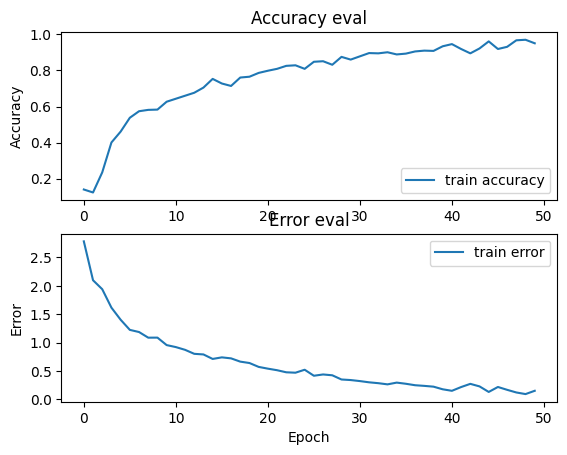

In [144]:
plot_history(history)

In [145]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)


[0.783356249332428, 0.792682945728302]


In [146]:
def get_index(row):
  c=0
  for i in row:
    if(i==1):
      return c
    c+=1


# SAMPLE PREDICTION

In [147]:
x1=X_test[4]
x1=x1[np.newaxis, ...]
prediction=model.predict(x1)
predicted_index = np.argmax(prediction, axis=1)
print('Predicted label:')
print(labels[int(predicted_index)])
print('Correct label:')
print(labels[get_index(y_test[4])])


1/1 [==============================] - 0s 140ms/step
Predicted label:
sarang
Correct label:
sarang
